## FootballDecoded - Test Pass Network
### Prueba rápida de visualización de redes de pase

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Import enhanced match_data system
from match_data import extract_match_data, print_match_summary, extract_complete_match

# Import visualization modules
from visualization.charts.pass_network import (
    create_pass_network,
    create_pass_network_by_halves,
    create_pass_network_single_half
)

# Import core modules
from visualization.core import draw_pitch, get_team_colors

In [2]:
print("Loading match data...")
match_data = extract_match_data(match_id=1825726, league="ESP-La Liga", season="2024-25")

# Define team colors
BARCELONA_COLORS = {
    'primary': '#A50044',    
    'secondary': '#004D98'   
}

ESPANYOL_COLORS = {
    'primary': '#2C3E50',
    'secondary': '#0E4A99'
}

Loading match data...
Processing match 1825726 (ESP-La Liga 2024-25) - Source: whoscored
   Data found, loading from cache...



1. Barcelona - Full Match
Creating pass network for Barcelona (Full match)


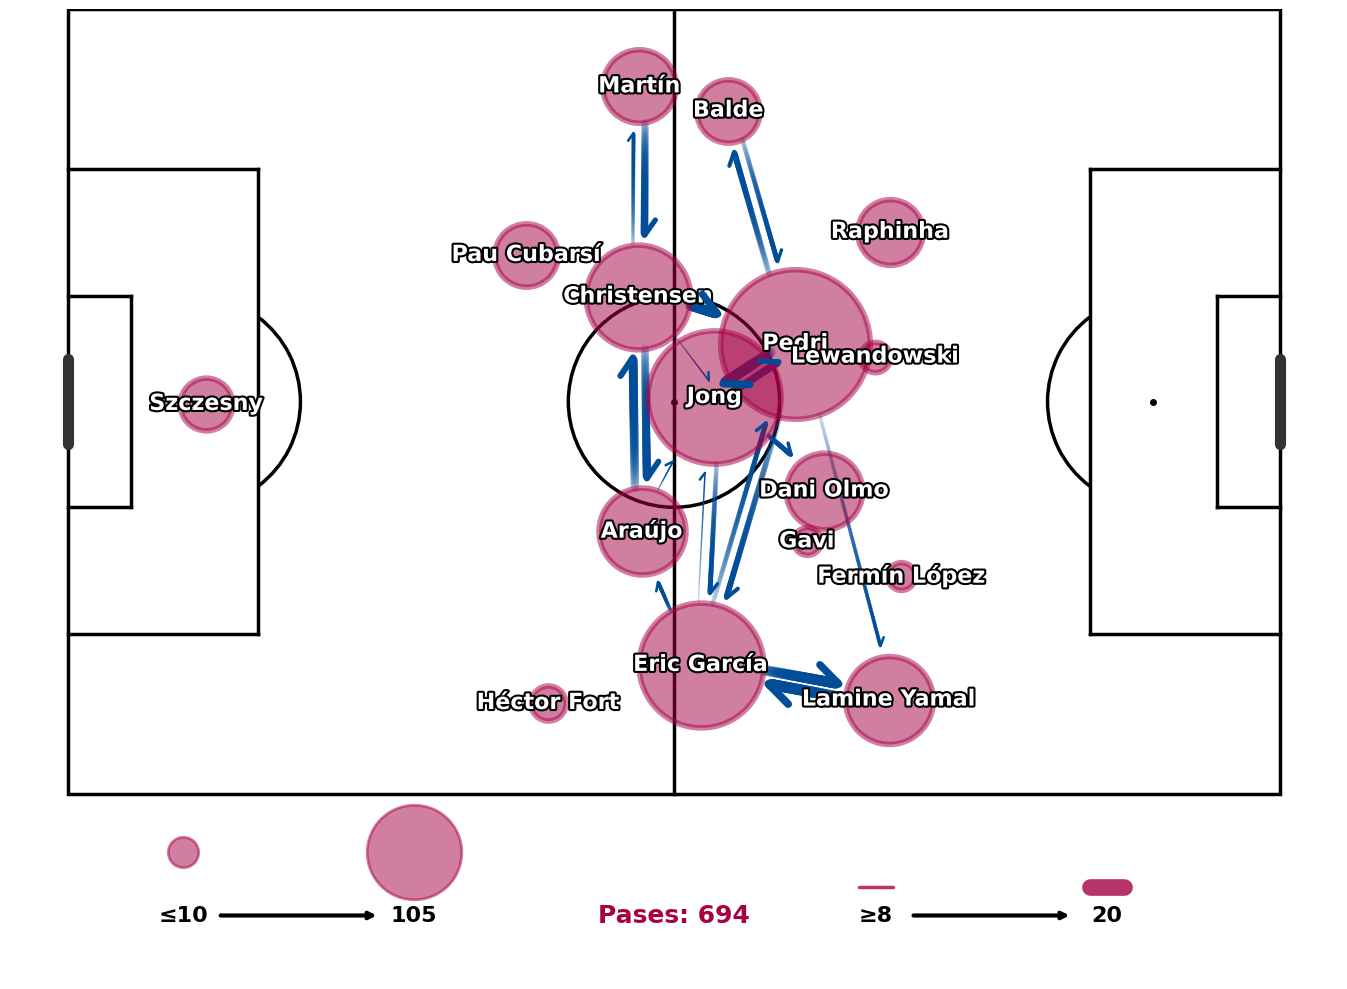

In [3]:
# Barcelona full match

print("\n1. Barcelona - Full Match")
fig_barca = create_pass_network(
    match_data, 
    "Barcelona",
    primary_color=BARCELONA_COLORS['primary'],
    secondary_color=BARCELONA_COLORS['secondary'],
)
plt.show()

# Espanyol full match  
# print("\n2. Espanyol - Full Match")
# fig_espanyol = create_pass_network(
#    match_data, 
#    "Espanyol",
#    primary_color=ESPANYOL_COLORS['primary'], 
#    secondary_color=ESPANYOL_COLORS['secondary'],
# )
# plt.show()

Saved: barcelona_espanyol_shots.png


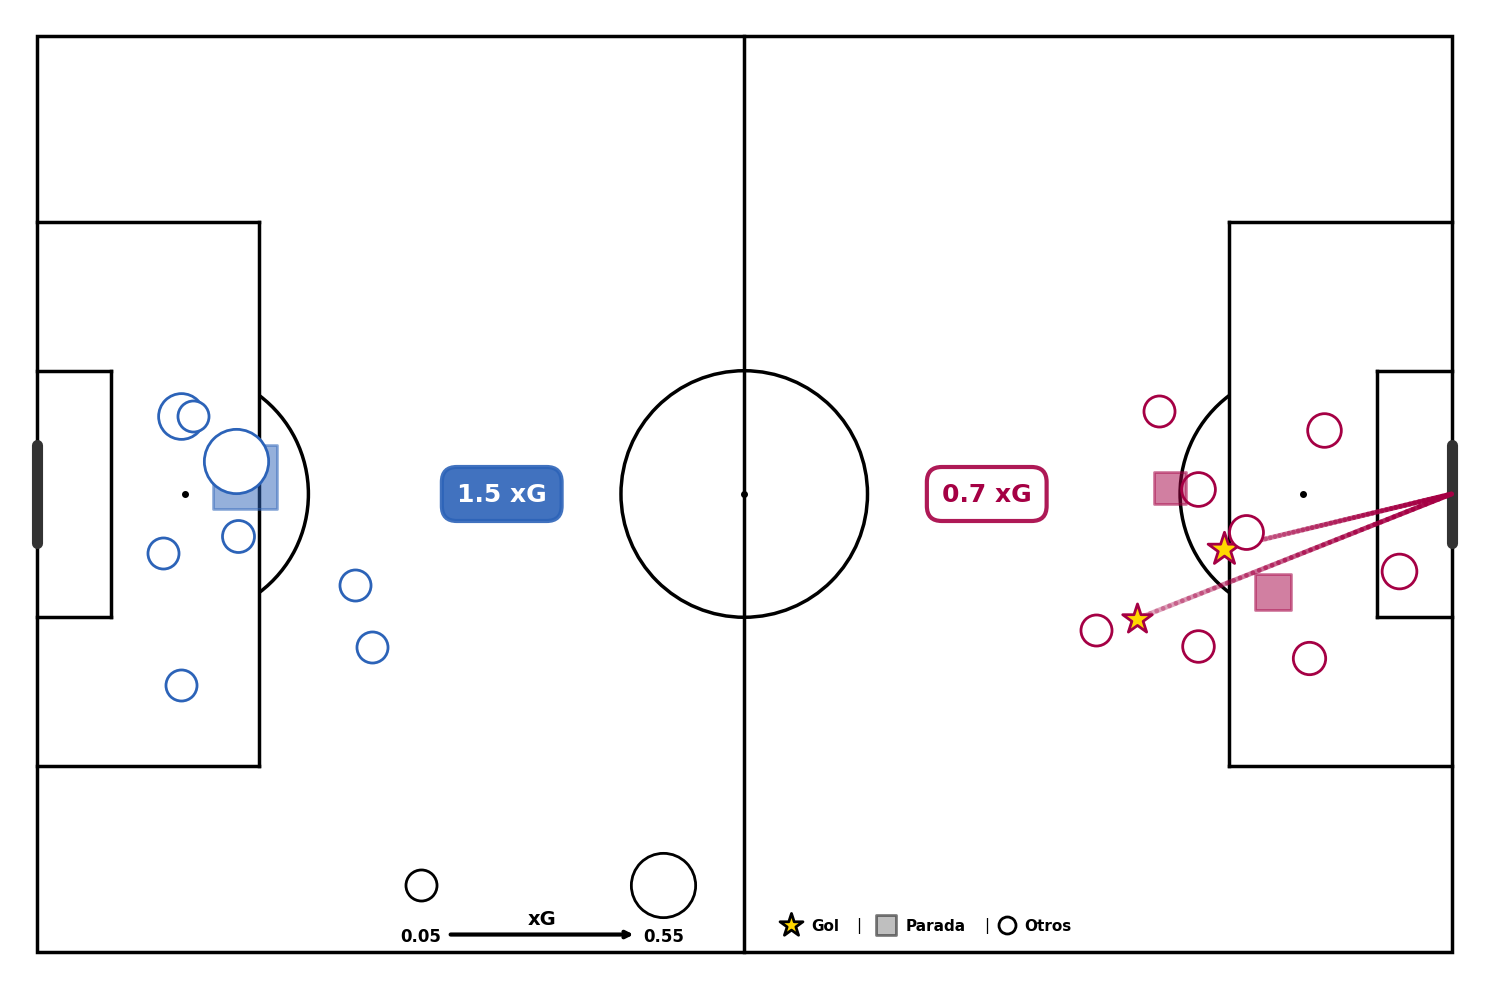

In [4]:
# Shot map
from visualization.charts.shot_map import create_shot_map
fig_shots = create_shot_map(27332, "ESP-La Liga", "2024-25", save_path="barcelona_espanyol_shots.png")
plt.show()